# Introduction To Data Science – Assignment 2

---

#### Sections A – B – C – D

---

##***Instructions: Read These Carefully Before Starting!***

1. Due Date: Thursday 20th October 2022 – 11:59PM

2. **Name the file in the format Lyyxxxx_A2.ipynb and save it as .ipynb (e.g. L216666_A2.ipynb)**

3. Submission will be taken on Google Classroom (**submit SINGLE .ipynb file ONLY**)

4. **Assignment will not be evaluated if**:

> * You submit python (.py) files
> * You submit multiple .ipynb files
> * You submit compressed (.rar or .zip) files

5. **Work in the spaces provided and do not delete/modify any cells from this template.**

6. Upload data files directly to Google Colab - do not use Google Drive or GitHub linking method

*Not following these instructions will lead to mark deduction.*

---

All source files needed to complete this assignment can be found on the following [Google Drive link](https://drive.google.com/drive/folders/1qBib_6ZOhvHb73ZRLWiCMWl9NFyU1IDO?usp=sharing). Download these files and upload them to your Google Colab Notebook.

**Do not link Google Drive or GitHub with Colab.**

**Do not add these files with your submission on Google Classroom.**

---

Happy Coding 🌺

---

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

---

---
## Question 0

Add all library imports here

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

---
## Question 1

####Single Linear Regression with Gradient Descent

> Take help from slides 26 and 30
---

**Part A -**
Write a function that calculates and returns value for hypothesis $h_\theta(x)$

In [ ]:
# complete this function implementation
def hypothesis(x, theta):
  return theta[0] + theta[1] * x

**Part B -**
Write a function that calculates and returns value for loss/cost $J(\theta_0, \theta_1)$

In [ ]:
# complete this function implementation
def loss(hypothesis_x, y):
    m = len(hypothesis_x)
    return sum([(hypothesis_x[i] - y[i])**2 for i in range(m)]) / (2 * m)

**Part C-**
Write a function that applies the gradient descent algorithm and updates values of $\theta_0$ and $\theta_1$ until they converge.

* take default vaue of $α$ to be 0.015
* take default number of iterations to be 15000
* print loss after every 500 iterations

In [ ]:
# complete this function implementation
def gradientDescent(x, y, theta, numIterations=15000, alpha=0.015):
    m = len(x)

    for j in range(numIterations):

        # predict
        h = []
        for num in x:
          h.append(hypothesis(num, theta))

        # compute slope, aka derivative with current params (theta)
        deri_th0 = sum([(h[i] - y[i]) for i in range(m)]) / m
        deri_th1 = sum([(h[i] - y[i]) * x[i] for i in range(m)]) / m

        # update parameters (moving against the gradient 'derivative')
        theta[0] = theta[0] - alpha * deri_th0
        theta[1] = theta[1] - alpha * deri_th1

        # report
        if j % 500 == 0:
            print("Loss at iteration", j, ":", loss(h, y))

**Part D -**
FactoryRevenue.csv contains information about the number of workers in a factory and the annual profit for that factory. Import the file FactoryRevenue.csv as a Pandas DataSet and print out the information for it.

In [ ]:
df = pd.read_csv("Update_FactoryRevenue.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalFactoryWorkers  98 non-null     float64
 1   AnnualProfit         98 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB
None


**Part E -**
Remove rows that have any null values

In [ ]:
print(df.isna().sum())
df.dropna(inplace=True)
print(df.isna().sum())

TotalFactoryWorkers    1
AnnualProfit           1
dtype: int64
TotalFactoryWorkers    0
AnnualProfit           0
dtype: int64


**Part F -**

First identify the independant and dependant variables.

Then create two arrays named x and y and add independant variable data to array x, dependant variable data to array y.

In [ ]:
# independant variable: TotalFactoryWorkers
# dependant variable: AnnualProfit

x = df['TotalFactoryWorkers'].to_numpy()
y = df['AnnualProfit'].to_numpy()

**Part G -**

Create an array called 'theta' that will hold $θ_0$ and $θ_1$. Initalize both values to 0.

Then call the gradientDescent function using array x, array y, and array theta. Do not provide any other input parameters.

Print out the values of y-intercept and slope/gradient

In [ ]:
theta = [0, 0]
gradientDescent(x, y, theta)

print("\n\nintercept: ", theta[0])
print("slope: ", theta[1])

Loss at iteration 0 : 32.07273387745566
Loss at iteration 500 : 4.5729421410816515
Loss at iteration 1000 : 4.483372590612987
Loss at iteration 1500 : 4.477398334630701
Loss at iteration 2000 : 4.476999853960036
Loss at iteration 2500 : 4.476973275446268
Loss at iteration 3000 : 4.476971502669197
Loss at iteration 3500 : 4.476971384425622
Loss at iteration 4000 : 4.47697137653882
Loss at iteration 4500 : 4.476971376012773
Loss at iteration 5000 : 4.476971375977688
Loss at iteration 5500 : 4.476971375975346
Loss at iteration 6000 : 4.476971375975188
Loss at iteration 6500 : 4.476971375975177
Loss at iteration 7000 : 4.476971375975176
Loss at iteration 7500 : 4.476971375975181
Loss at iteration 8000 : 4.476971375975181
Loss at iteration 8500 : 4.476971375975178
Loss at iteration 9000 : 4.476971375975181
Loss at iteration 9500 : 4.47697137597518
Loss at iteration 10000 : 4.476971375975178
Loss at iteration 10500 : 4.47697137597518
Loss at iteration 11000 : 4.476971375975178
Loss at iterat

**Part H -** Plot a scatter plot and regression line on the same graph

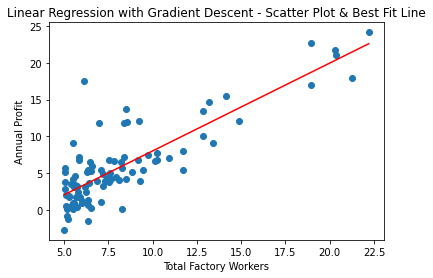

In [ ]:
plt.scatter(x, y)

x_range = np.linspace(x.min(), x.max())
y_range = (theta[1] * x_range + theta[0])
plt.plot(x_range, y_range, color="red")

plt.xlabel("Total Factory Workers")
plt.ylabel("Annual Profit")
plt.title("Linear Regression with Gradient Descent - Scatter Plot & Best Fit Line")
plt.show()

---
## Question 2

Logistic Regression on Flowers Dataset

---



**Part A** - Load the file FlowersData.csv and describe the dataset

In [ ]:
df = pd.read_csv('/FlowersData.csv')
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Part B** - Split data into training and test data using SKLearn train_test_split. Specify parameter test_size to be 25%

Hint: You will be needing 4 arrays: X_train, X_test, y_train, y_test

In [ ]:
X = df.iloc[:, [0,1,2, 3]].values
y = df.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

**Part C** - Perform scaling on the X_test and X_train values using StandardScacler from SKLearn Library

StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure. StandardScaler removes the mean and scales the data to the unit variance
If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Part D** - Train Model using SKLearn LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Part E** - Predict Labels for test split

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)
#print(classifier.intercept_)
#print(classifier.coef_)


['lily' 'lily' 'daffodil' 'daffodil' 'daffodil' 'lily' 'lily' 'hibiscus'
 'daffodil' 'daffodil' 'lily' 'lily' 'lily' 'hibiscus' 'hibiscus'
 'daffodil' 'hibiscus' 'daffodil' 'lily' 'hibiscus' 'lily' 'daffodil'
 'daffodil' 'daffodil' 'daffodil' 'hibiscus' 'daffodil' 'lily' 'lily'
 'lily' 'daffodil' 'lily' 'hibiscus' 'lily' 'daffodil' 'daffodil'
 'daffodil' 'lily']


---
## Question 3

Confusion Matrix Construction

---

**Part A** - Using the prediction result of logistic regression (Question 2) construct a confusion matrix using SKLearn confusion_matrix

Print out this confusion matrix

[[16  0  1]
 [ 0  7  0]
 [ 0  0 14]]


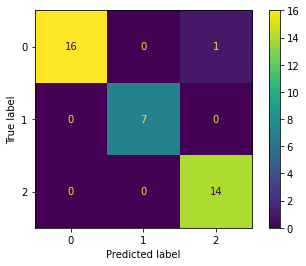

In [ ]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

**Part B** - Calculate and print Accuracy

In [ ]:
print(metrics.accuracy_score(actual, predicted))


0.9736842105263158


**Part C** - Calculate and print Recall

In [ ]:
print(metrics.recall_score(actual, predicted,average='micro'))

0.9736842105263158


**Part D** - Calculate and print Precision

In [ ]:
print(metrics.precision_score(actual, predicted,average='micro'))

0.9736842105263158


**Part E** - Calculate and print $𝐹_1$ Score

In [ ]:
print(metrics.f1_score(actual, predicted,average='micro'))

0.9736842105263158


**MATERIAL FOR VIVA**


*   https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

*   https://towardsdatascience.com/precision-and-recall-88a3776c8007#:~:text=Precision%20is%20calculated%20by%20dividing,was%20predicted%20as%20a%20positive.&text=Recall%20

*   https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21

*   https://www.analyticsvidhya.com/blog/2020/12/beginners-take-how-logistic-regression-is-related-to-linear-regression/

*   https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832#:~:text=StandardScaler%20remov


*   https://medium.com/@KrishnaRaj_Parthasarathy/ml-classification-why-accuracy-is-not-a-best-measure-for-assessing-ceeb964ae47c


*   https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/#:~:text=There%20are%20many%20ways%20for,used%20metrics%20for%20classification%20problems.








